## House Price Prdiction
#### import important libraries

In [1]:
# import libraries we will use
import warnings
warnings.filterwarnings('ignore')

# matplotlib for plotting
from matplotlib import pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
%matplotlib inline
import time

# pandas for dataframes
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# numpy for linear algebra
import numpy as np

# sklearn for machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# load da set into a pandas dataframe
data = pd.read_csv('./kingcounty_house_data.csv')

In [3]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
data.shape

(21613, 21)

In [5]:
price=data.price

In [6]:
price.head(5)

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [7]:
data.drop("price",1,inplace=True)

In [8]:
Id=data.id

In [9]:
data.drop("id",1,inplace=True)

In [10]:
data.drop("date",1,inplace=True)

In [11]:
data.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [12]:
data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [13]:
data.bathrooms.unique()

array([ 1.  ,  2.25,  3.  ,  2.  ,  4.5 ,  1.5 ,  2.5 ,  1.75,  2.75,
        3.25,  4.  ,  3.5 ,  0.75,  4.75,  5.  ,  4.25,  3.75,  0.  ,
        1.25,  5.25,  6.  ,  0.5 ,  5.5 ,  6.75,  5.75,  8.  ,  7.5 ,
        7.75,  6.25,  6.5 ])

In [14]:
data.sqft_living.unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425])

In [15]:
data[data.sqft_living.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [16]:
data[data.sqft_lot.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [17]:
data[data.floors.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [18]:
data[data.waterfront.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [19]:
data.waterfront.unique()

array([0, 1])

In [20]:
data[data.view.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [21]:
data.view.unique()

array([0, 3, 4, 2, 1])

In [22]:
data[data.condition.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [23]:
data[data.grade.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [24]:
data[data.sqft_above.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [25]:
data[data.yr_built.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [26]:
data[data.yr_renovated.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [27]:
data[data.lat.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [28]:
data[data.long.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [29]:
data[data.sqft_living15.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [30]:
data[data.sqft_lot15.isnull()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [31]:
data.drop("sqft_living15",1,inplace=True)

In [32]:
data.drop("sqft_lot15",1,inplace=True)

In [33]:
# data.drop("grade",1,inplace=True)

In [34]:
data.drop("waterfront",1,inplace=True)

In [35]:
# data.drop("sqft_above",1,inplace=True)

In [36]:
train = data.ix[0:15000]
test= data.ix[15001:]

In [37]:
target_value=  price

In [38]:
target_value.head(5)

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [39]:
target=target_value[0:15001]

In [40]:
target.shape

(15001,)

In [41]:
train.shape

(15001, 15)

In [42]:
test.shape

(6612, 15)

In [43]:
start=time.time()

In [44]:
clf = RandomForestClassifier(n_estimators=25)

In [45]:
clf=clf.fit(train, target)

In [46]:
for header, value in zip(train.columns,clf.feature_importances_):
    print (header," : ", value)

bedrooms  :  0.0410288160727
bathrooms  :  0.0539348033325
sqft_living  :  0.107847116917
sqft_lot  :  0.118503933628
floors  :  0.0201291160515
view  :  0.0132229706411
condition  :  0.0345646662437
grade  :  0.0278950623365
sqft_above  :  0.10859692968
sqft_basement  :  0.0508539513261
yr_built  :  0.103982111682
yr_renovated  :  0.00996337741051
zipcode  :  0.0725939724519
lat  :  0.122945537674
long  :  0.113937634551


In [47]:
Output = clf.predict(test)


In [48]:
end=time.time()

In [49]:
elapsed = end - start
print(elapsed)

53.5876100063324


In [50]:
homeId=Id[15001:]

In [51]:
homeId.shape

(6612,)

In [52]:
# result = pd.DataFrame(columns=['Id', 'price'])

In [53]:
# result['Id'] = homeId
# result['price'] = Output.astype(int)

In [54]:
# result.drop("Sprice",1,inplace=True)

In [55]:
# result.to_csv('HousingPrice.csv', index=False)

In [56]:
# print(result.head(10)) 

In [57]:
ground_truth=target_value[15001:]

In [58]:
ground_truth.shape

(6612,)

In [59]:
# mean_squared_error(ground_truth,result.price)

In [60]:
# accuracy_score(ground_truth,result.price)

In [61]:
# mean_absolute_error(ground_truth,result.price,multioutput='raw_values')

In [62]:
Resultant = pd.DataFrame(columns=['ground_truth', 'Estimated'])

In [63]:
Resultant['ground_truth']=ground_truth

In [64]:
Resultant['Estimated']=Output.astype(int)

In [65]:
print(Resultant.head(20))

       ground_truth  Estimated
15001      525000.0     635000
15002      745000.0     635000
15003      397000.0     485000
15004      233000.0     350000
15005      625000.0     565000
15006      535000.0     465000
15007      270000.0     304500
15008      360000.0     420200
15009     1105000.0    1325000
15010      970000.0    1300000
15011      915000.0    1030000
15012      412000.0     460000
15013      265000.0     260000
15014      426000.0     425000
15015      266000.0     260000
15016      325000.0     455000
15017      615000.0     500000
15018      310000.0     298700
15019      340000.0     531000
15020      562500.0     352950


In [66]:
total=Resultant['ground_truth'].sum()

In [67]:
total_estimated=Resultant['Estimated'].sum()

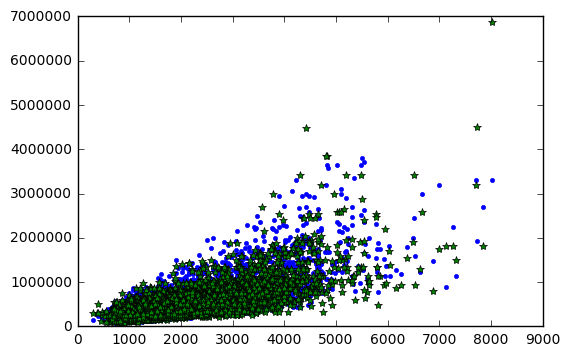

In [68]:
plt.plot(test['sqft_living'],Resultant['ground_truth'],'.',test['sqft_living'],Resultant['Estimated'],'*')

In [69]:
print(abs(total_estimated-total)/total)

0.0772210414631818


In [70]:
# x = Resultant['ground_truth']
# y = Resultant['Estimated']
# plt.plot(x, y)


## APPLYING RANDOMIZATION

In [71]:
df=pd.read_csv('./kingcounty_house_data.csv')


In [72]:
sample_data=df.take(np.random.permutation(len(df))[:2500])

In [73]:
sample_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9010,2675600025,20150327T000000,603500.0,3,1.75,2140,7280,1.0,0,0,3,7,1070,1070,1910,0,98117,47.6993,-122.377,2280,8400
14503,1313000220,20140513T000000,675000.0,5,3.00,3410,9600,1.0,0,0,4,8,1870,1540,1968,0,98052,47.6358,-122.103,2390,9679
8230,5366200205,20140603T000000,613000.0,3,2.50,1350,3068,2.0,0,0,3,7,1350,0,1991,0,98122,47.6099,-122.293,1900,4000
12148,5700001895,20150302T000000,895000.0,4,1.50,3390,6200,2.0,0,0,4,8,2530,860,1916,0,98144,47.5800,-122.290,3080,6000
13187,6383000790,20150122T000000,626000.0,4,2.50,2570,7221,1.0,0,0,4,8,1570,1000,1958,0,98117,47.6921,-122.387,2440,7274
16375,1446401190,20150317T000000,175000.0,2,1.00,620,6600,1.0,0,0,3,6,620,0,1963,0,98168,47.4862,-122.330,1050,6600
12894,7454001120,20141212T000000,285950.0,2,1.00,710,7120,1.0,0,0,5,6,710,0,1942,0,98146,47.5122,-122.374,1100,7020
6269,9831200221,20140710T000000,670000.0,3,2.50,1420,1438,2.0,0,0,3,9,1280,140,2003,0,98102,47.6265,-122.323,1490,1439
13893,9525100040,20150407T000000,705000.0,4,3.25,2740,5339,2.5,0,0,3,9,2740,0,2004,0,98103,47.6706,-122.356,1770,4820
1893,3528000260,20141111T000000,915000.0,4,2.50,3510,28052,2.0,0,0,3,10,3510,0,1988,0,98053,47.6671,-122.057,2890,28295


In [74]:
sample_price=sample_data.price

In [75]:
sample_price.head()

9010     603500.0
14503    675000.0
8230     613000.0
12148    895000.0
13187    626000.0
Name: price, dtype: float64

In [76]:
train, test = train_test_split(sample_data, test_size = 0.3)

In [77]:
train_price=train.price

In [78]:
test_price=test.price

In [79]:
train.drop("price",1,inplace=True)

In [80]:
train.drop("date",1,inplace=True)

In [81]:
train.drop("waterfront",1,inplace=True)

In [82]:
train.drop("sqft_living15",1,inplace=True)

In [83]:
train.drop("sqft_lot15",1,inplace=True)

In [84]:
test.drop("price",1,inplace=True)

In [85]:
test.drop("date",1,inplace=True)

In [86]:
test.drop("waterfront",1,inplace=True)

In [87]:
test.drop("sqft_living15",1,inplace=True)

In [88]:
test.drop("sqft_lot15",1,inplace=True)

In [89]:
start=time.time()

In [90]:
clf = RandomForestClassifier()

In [91]:
clf=clf.fit(train, train_price)

In [92]:
for header, value in zip(train.columns,clf.feature_importances_):
    print (header," : ", value)

id  :  0.0954523425541
bedrooms  :  0.0372805593534
bathrooms  :  0.0570891909957
sqft_living  :  0.0930395773446
sqft_lot  :  0.104999156988
floors  :  0.0202552279063
view  :  0.0111923978575
condition  :  0.0276343230089
grade  :  0.0368880662865
sqft_above  :  0.0958389653292
sqft_basement  :  0.045975770143
yr_built  :  0.0893071277886
yr_renovated  :  0.010583236982
zipcode  :  0.0708011383848
lat  :  0.106683577637
long  :  0.0969793414402


In [93]:
Output = clf.predict(test)

In [94]:
end=time.time()

In [95]:
elapsed = end - start
print(elapsed)

1.4869229793548584


In [96]:
# tree.export_graphviz(clf,out_file='tree.dot')

In [97]:
Random_Result=pd.DataFrame(columns=['ground_truth', 'Estimated'])

In [98]:
Random_Result['ground_truth']=test_price

In [99]:
Random_Result['Estimated']=Output.astype(int)

In [100]:
# print(Random_Result.head(10))

In [101]:
mean_squared_error(test_price,Random_Result['Estimated'])

60249337611.038666

In [102]:
mean_absolute_error(test_price,Random_Result['Estimated'])

147744.28933333332

In [103]:
print(Random_Result.head(20))

       ground_truth  Estimated
12816      760000.0     340000
20057      434900.0     499000
15696      450000.0     320000
15819      172500.0     204000
7080       477000.0     449950
7551       300000.0     256000
137        452000.0     425000
1607       336000.0     408000
906        314950.0     295000
15923      431000.0     335000
12327      499000.0     541100
16821      610000.0     359950
9247       240000.0     230000
20535     2950000.0    1550000
16155      465000.0     419950
11277      511000.0     422000
16739      554000.0     660000
7638       250000.0     352000
2875       600000.0     402000
17209     1450000.0    2535000


In [104]:
total=Random_Result['ground_truth'].sum()

In [105]:
total_estimated=Random_Result['Estimated'].sum()

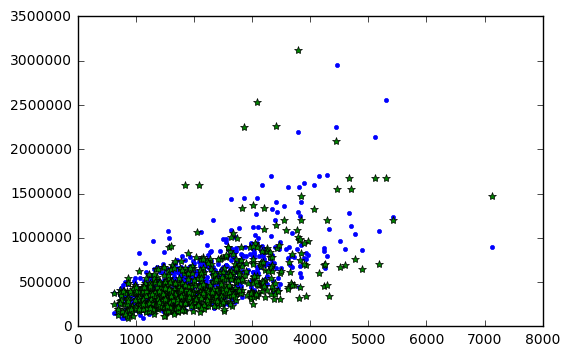

In [106]:
plt.plot(test['sqft_living'],Random_Result['ground_truth'],'.',test['sqft_living'],Random_Result['Estimated'],'*')

In [107]:
print(abs(total_estimated-total)/total)

0.13151714407983314


## Without Randomization

In [108]:
df=pd.read_csv('./kingcounty_house_data.csv')

In [109]:
data=df[:2500]

In [110]:
price=data.price

In [111]:
train, test = train_test_split(data, test_size = 0.3)

In [112]:
train_price=train.price

In [113]:
test_price=test.price

In [114]:
train.drop("price",1,inplace=True)

In [115]:
train.drop("date",1,inplace=True)

In [116]:
train.drop("waterfront",1,inplace=True)

In [117]:
train.drop("sqft_living15",1,inplace=True)

In [118]:
train.drop("sqft_lot15",1,inplace=True)

In [119]:
test.drop("price",1,inplace=True)

In [120]:
test.drop("date",1,inplace=True)

In [121]:
test.drop("waterfront",1,inplace=True)

In [122]:
test.drop("sqft_living15",1,inplace=True)

In [123]:
test.drop("sqft_lot15",1,inplace=True)

In [124]:
start=time.time()

In [125]:
clf = RandomForestClassifier()

In [126]:
clf=clf.fit(train, train_price)

In [127]:
for header, value in zip(train.columns,clf.feature_importances_):
    print (header," : ", value)

id  :  0.103685493376
bedrooms  :  0.0367719069494
bathrooms  :  0.0508104264651
sqft_living  :  0.0922576526251
sqft_lot  :  0.0998987291592
floors  :  0.0194248372118
view  :  0.0145186688542
condition  :  0.0316736244301
grade  :  0.0345593757465
sqft_above  :  0.0970408333179
sqft_basement  :  0.0444353390593
yr_built  :  0.0887326030851
yr_renovated  :  0.0082584539757
zipcode  :  0.071693541943
lat  :  0.103950065062
long  :  0.10228844874


In [128]:
Output = clf.predict(test)

In [129]:
end=time.time()

In [130]:
elapsed = end - start
print(elapsed)

0.849092960357666


In [131]:
Subset_Result=pd.DataFrame(columns=['ground_truth', 'Estimated'])

In [132]:
Subset_Result['ground_truth']=test_price

In [133]:
Subset_Result['Estimated']=Output.astype(int)

In [134]:
print(Subset_Result.head(20))

      ground_truth  Estimated
443       350000.0     220000
2069      437000.0     259950
2331      307000.0     245000
1447      290000.0     416000
1074      515000.0     330000
363       604950.0     270500
2257      265000.0     245000
1782      190000.0     100000
1984      310000.0     340000
2166      265000.0     277000
212       592500.0     639000
376       450000.0     299000
1399      408000.0     419000
753       699800.0     677900
934       891000.0     822500
2000      470450.0     425000
130       212000.0     260000
715       250000.0     220000
654       337000.0     381000
673       865000.0     800000


In [135]:
total=Subset_Result['ground_truth'].sum()

In [136]:
Subset_Result[['ground_truth','Estimated']]

,ground_truth,Estimated
443,350000.0,220000
2069,437000.0,259950
2331,307000.0,245000
1447,290000.0,416000
1074,515000.0,330000
363,604950.0,270500
2257,265000.0,245000
1782,190000.0,100000
1984,310000.0,340000
2166,265000.0,277000


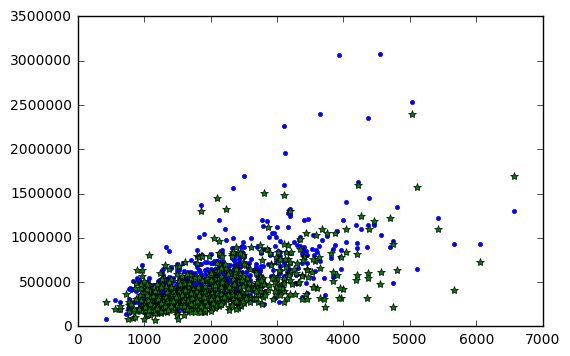

In [137]:
plt.plot(test['sqft_living'],Subset_Result['ground_truth'],'.',test['sqft_living'],Subset_Result['Estimated'],'*')

In [138]:
total_estimated=Subset_Result['Estimated'].sum()

In [139]:
print(abs(total_estimated-total)/total)

0.19732660510938446
